# Introduction to SciPy

- SciPy is a collection of mathematical algorithms and convenience functions built on the NumPy extension of Python.


- It adds significant power to the interactive Python session by providing the user high-level commands and classes for manipulating and visualizing data.


- With SciPy, an interactive Python session becomes a data-processing and system-prototyping environment, rivaling systems such as MATLAB, IDL, Octave, R-Lab, and SciLab.


SciPy is organized into subpackages covering different scientific
computing domains. These are summarized in the following table:

```rst
==================  ======================================================
Subpackage          Description
==================  ======================================================
`cluster`           Clustering algorithms
`constants`         Physical and mathematical constants
`fftpack`           Fast Fourier Transform routines
`integrate`         Integration and ordinary differential equation solvers
`interpolate`       Interpolation and smoothing splines
`io`                Input and Output
`linalg`            Linear algebra
`ndimage`           N-dimensional image processing
`odr`               Orthogonal distance regression
`optimize`          Optimization and root-finding routines
`signal`            Signal processing
`sparse`            Sparse matrices and associated routines
`spatial`           Spatial data structures and algorithms
`special`           Special functions
`stats`             Statistical distributions and functions
==================  ======================================================
```


## Scipy.special

The main feature of the [scipy.special](https://docs.scipy.org/doc/scipy/reference/special.html#module-scipy.special) package is the definition of numerous special functions of mathematical physics. Available functions include airy, elliptic, bessel, gamma, beta, hypergeometric, parabolic cylinder, mathieu, spheroidal wave, struve, and kelvin.


### Bessel functions of real order(`jv`, `jn_zeros`)

Bessel functions are a family of solutions to Bessel's differential equation
with real or complex order alpha:

$$x^2 \frac{d^2 y}{dx^2} + x \frac{dy}{dx} + (x^2 - \alpha^2)y = 0$$


Among other uses, these functions arise in wave propagation problems, such as
the vibrational modes of a thin drum head. Here is an example of a circular
drum head anchored at the edge:


In [1]:
from scipy import special
import numpy as np


def drumhead_height(n, k, distance, angle, t):
    kth_zero = special.jn_zeros(n, k)[-1]
    return np.cos(t) * np.cos(n * angle) * special.jn(n, distance * kth_zero)


theta = np.r_[0 : 2 * np.pi : 50j]
radius = np.r_[0:1:50j]

x = np.array([r * np.cos(theta) for r in radius])
y = np.array([r * np.sin(theta) for r in radius])
z = np.array([drumhead_height(1, 1, r, theta, 0.5) for r in radius])

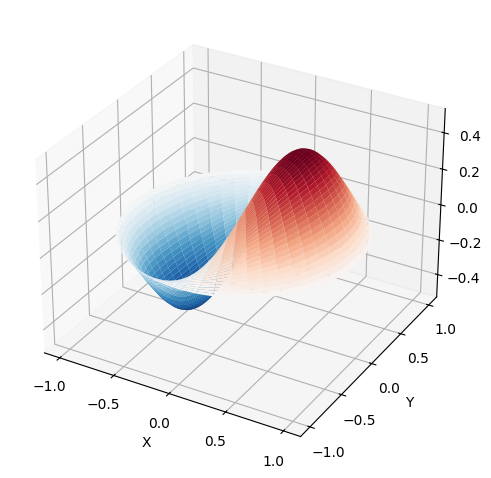

In [2]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes(rect=(0, 0.05, 0.95, 0.95), projection="3d")
ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap="RdBu_r", vmin=-0.5, vmax=0.5)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_xticks(np.arange(-1, 1.1, 0.5))
ax.set_yticks(np.arange(-1, 1.1, 0.5))
ax.set_zlabel("Z")
plt.show()

## Integration

The [scipy.integrate](https://docs.scipy.org/doc/scipy/reference/integrate.html#module-scipy.integrate) sub-package provides several integration techniques including an ordinary differential equation integrator. An overview of the module is provided by the help command:


### General Integration

The function `quad` is provided to integrate a function of one variable between two points. The points can be $\pm\infty$ ($\pm inf$) to indicate infinite limits. For example, suppose you wish to integrate a bessel function `jv(2.5, x)` along the interval [0, 4.5].

$$I=\int_{0}^{4.5}J_{2.5}\left(x\right)\, dx.$$


In [3]:
import scipy.integrate as integrate
import scipy.special as special

result = integrate.quad(lambda x: special.jv(2.5, x), 0, 4.5)
result

(1.1178179380783253, 7.866317250224184e-09)

- The first argument to quad is a “callable” Python object (i.e., a function, method, or class instance).
- Notice the use of a lambda- function in this case as the argument.
- The next two arguments are the limits of integration.
- The return value is a tuple, with the first element holding the estimated integral value and the second element holding an upper bound on the error.


## Optimization

- SciPy has a bunch of built-in fitting methods, which forms the framework for curve fitting and other more advanced optimization
- You could take an entire course that discusses the details of these optimization methods
- Generally, in machine learning, we have so many dimensions that it is possible to use simple optimizers


### Example: Curve Fitting


In [4]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


In [5]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c


Define the noisy data to fit:


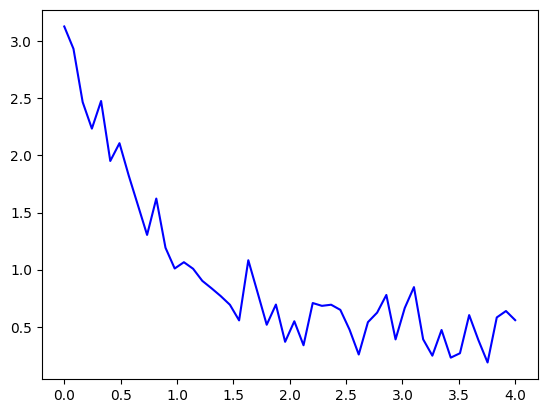

In [6]:
xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
rng = np.random.default_rng()
y_noise = 0.2 * rng.normal(size=xdata.size)
ydata = y + y_noise
plt.plot(xdata, ydata, "b-", label="data")

Fit for the parameters a, b, c of the function func:


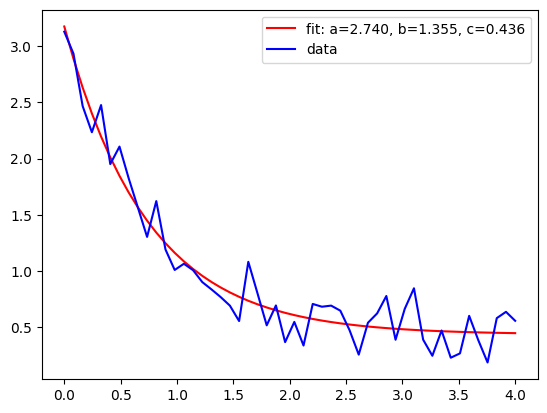

In [7]:
popt, pcov = curve_fit(func, xdata, ydata)
popt
plt.plot(
    xdata,
    func(xdata, *popt),
    "r-",
    label="fit: a=%5.3f, b=%5.3f, c=%5.3f" % tuple(popt),
)
plt.plot(xdata, ydata, "b-", label="data")
plt.legend()

Constrain the optimization to the region of 0 <= a <= 3, 0 <= b <= 1 and 0 <= c <= 0.5:


In [8]:
popt, pcov = curve_fit(func, xdata, ydata, bounds=(0, [3.0, 1.0, 0.5]))
popt

array([2.61374518, 1.        , 0.30171506])

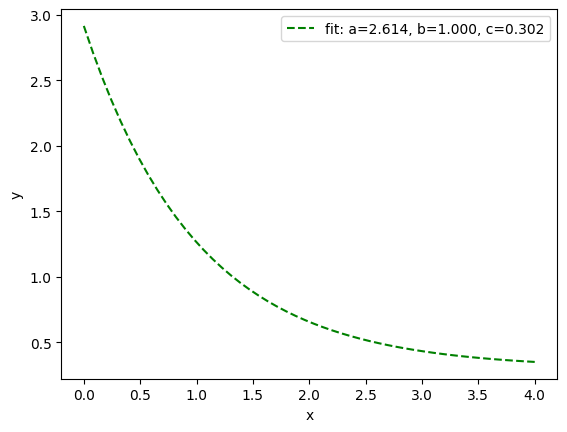

In [9]:
plt.plot(
    xdata,
    func(xdata, *popt),
    "g--",
    label="fit: a=%5.3f, b=%5.3f, c=%5.3f" % tuple(popt),
)

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

## Interpolation

There are several general interpolation facilities available in SciPy, for data in 1, 2, and higher dimensions:

- A class representing an interplant ([interp1d](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d)) in 1-D, offering several interpolation methods.
- Convenience function [griddata](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.griddata.html#scipy.interpolate.griddata) offer a simple interface to interpolation in N dimensions (N = 1, 2, 3, 4, …). Object-oriented interface for the underlying routines is also available.
- [RegularGridInterpolator](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.RegularGridInterpolator.html#scipy.interpolate.RegularGridInterpolator) provides several interpolation methods on a regular grid in arbitrary (N) dimensions,


### Example: 1D Interpolation

The `interp1d` class in `scipy.interpolate` is a convenient method to create a function based on fixed data points, which can be evaluated anywhere within the domain defined by the given data using linear interpolation.


In [10]:
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

In [11]:
# Creates a linear-spaced vector
x = np.linspace(0, 10, num=11, endpoint=True)

# Function to generate raw data
y = np.cos(-(x**2) / 9.0)

# 1D Interpolate linear
f = interp1d(x, y)

# 1D Interpolate Cubic
f2 = interp1d(x, y, kind="cubic")

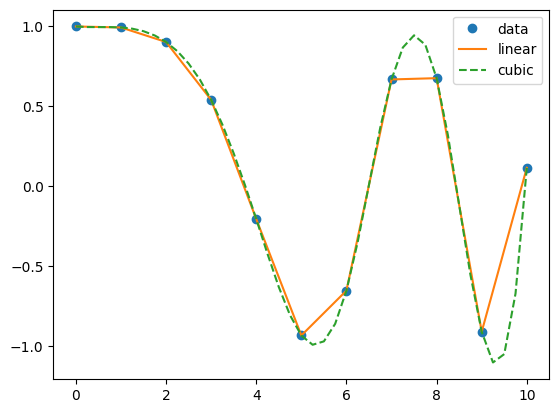

In [12]:
# Generates new higher-resolution x-data for interpolation
xnew = np.linspace(0, 10, num=41, endpoint=True)

# Makes the plots
plt.plot(x, y, "o", xnew, f(xnew), "-", xnew, f2(xnew), "--")
plt.legend(["data", "linear", "cubic"], loc="best")
plt.show()

## Fourier Transforms

Fourier analysis is a method for expressing a function as a sum of periodic components and for recovering the signal from those components.

- The DFT has become a mainstay of numerical computing in part because of fast algorithms for computing it, called the Fast Fourier Transform (FFT)
- Allows conversion of signals between time and frequency domain


The FFT $y[k]$ of length $N$ of the $N$ sequence $x[n]$ is defined as

$$ y[k] = \sum\_{n=0}^{N-1} e^{-2 \pi j \frac{k n}{N} } x[n] \, , $$

and the inverse transform is defined as follows

$$ x[n] = \frac{1}{N} \sum\_{k=0}^{N-1} e^{2 \pi j \frac{k n}{N} } y[k] \, . $$


### FFT Example:


In [13]:
from scipy.fft import fft, ifft

x = np.array([1.0, 2.0, 1.0, -1.0, 1.5])
y = fft(x)
yinv = ifft(y)

print(y)

print(yinv)

[ 4.5       -0.j          2.08155948-1.65109876j -1.83155948+1.60822041j
 -1.83155948-1.60822041j  2.08155948+1.65109876j]
[ 1. +0.j  2. +0.j  1. +0.j -1. +0.j  1.5+0.j]


In case the sequence x is real-valued, the values of $y[n]$ for positive frequencies are the conjugate of the values $y[n]$ for negative frequencies (because the spectrum is symmetric). Typically, only the FFT corresponding to positive frequencies is plotted.


### FFT Example: Sum of two Sines


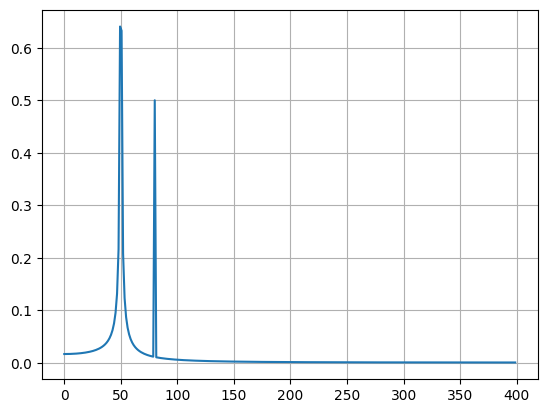

In [14]:
from scipy.fft import fft, fftfreq

# Number of sample points
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N * T, N, endpoint=False)
y = np.sin(50.0 * 2.0 * np.pi * x) + 0.5 * np.sin(80.0 * 2.0 * np.pi * x)
yf = fft(y)
xf = fftfreq(N, T)[: N // 2]
import matplotlib.pyplot as plt

plt.plot(xf, 2.0 / N * np.abs(yf[0 : N // 2]))
plt.grid()
plt.show()

### FFT Helper Functions

The function [fftfreq](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fftfreq.html#scipy.fft.fftfreq) returns the FFT sample frequency points.

```python
f = [0, 1, ...,   n/2-1,     -n/2, ..., -1] / (d*n)   if n is even
f = [0, 1, ..., (n-1)/2, -(n-1)/2, ..., -1] / (d*n)   if n is odd
```


In [15]:
from scipy.fft import fftfreq

freq = fftfreq(8, 0.125)
freq

array([ 0.,  1.,  2.,  3., -4., -3., -2., -1.])

The function [fftshift](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fftshift.html#scipy.fft.fftshift) allows swapping the lower and upper halves of a vector so that it becomes suitable for display. This shift the zero-frequency component to the center of the spectrum.


In [16]:
from scipy.fft import fftshift

x = np.arange(8)
print(fftshift(x))

freqs = np.fft.fftfreq(10, 0.1)
print(np.fft.fftshift(freqs))

[4 5 6 7 0 1 2 3]
[-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.]


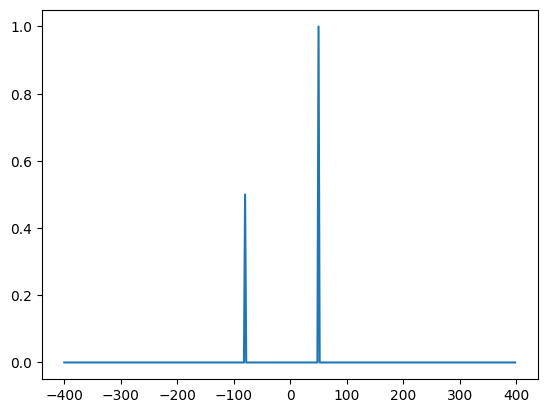

In [17]:
from scipy.fft import fft, fftfreq, fftshift
import matplotlib.pyplot as plt

# number of signal points
N = 400
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N * T, N, endpoint=False)
y = np.exp(50.0 * 1.0j * 2.0 * np.pi * x) + 0.5 * np.exp(-80.0 * 1.0j * 2.0 * np.pi * x)
yf = fft(y)
xf = fftfreq(N, T)
xf = fftshift(xf)
yplot = fftshift(yf)

plt.plot(xf, 1.0 / N * np.abs(yplot))
plt.show()

Scipy has many other useful functions. If interested, you can look at the source [documentation](https://docs.scipy.org/doc/scipy/index.html).
